In [1]:
import networkx as nx
import numpy as np

In [2]:
G=nx.Graph()

In [3]:
G.add_nodes_from(["Calculate percentages",
                  "Calculate cycle time",
                  "Calculate number of elements",
                  "Filter traces",
                  "Identify bottlenecks",
                  "Group traces",
                  "Identify attributes",
                  "Represent bar charts",
                  "Represent process map",
                  "Represent histograms",
                  "Calculate throughput",
                  "Calculate waiting time",
                  "Calculate frequency",
                  "Calculate statistics",
                 ])

In [4]:
weights=[
    92.73,65.45,85.45,54.55,50.91,#calculate percentages
    91.18,76.47,70.59, # Identify attributes
    
]
#weights=[weight/10 for weight in weights]

In [5]:
G

In [6]:
G.add_edges_from([
    #calculate percentages
    ("Calculate percentages","Calculate cycle time"),("Calculate percentages","Calculate number of elements"),("Calculate percentages","Filter traces"),("Calculate percentages","Identify bottlenecks"),("Calculate percentages","Group traces"),
    
    #Identify attributes
    ("Identify attributes","Calculate cycle time"),("Identify attributes","Filter traces"),("Identify attributes","Calculat number of elements"),
    
                 ])

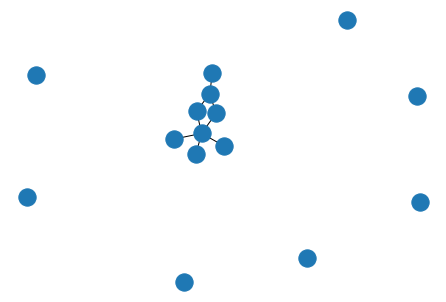

In [7]:
nx.draw(G)

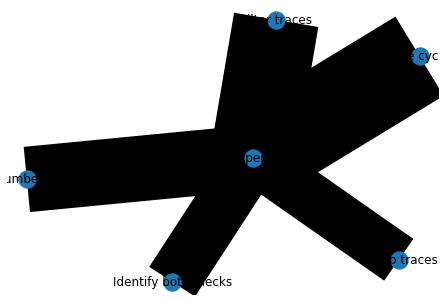

In [8]:
nx.draw(G,
        nodelist=["Calculate percentages",
                  "Calculate cycle time",
                  "Calculate number of elements",
                  "Filter traces",
                  "Identify bottlenecks",
                  "Group traces"
                 ],                         
        edgelist=[("Calculate percentages","Calculate cycle time"),
                  ("Calculate percentages","Calculate number of elements"),
                  ("Calculate percentages","Filter traces"),
                  ("Calculate percentages","Identify bottlenecks"),
                  ("Calculate percentages","Group traces")
                 ], 
        width=weights,
        with_labels=True
       )

In [9]:
weights

[92.73, 65.45, 85.45, 54.55, 50.91, 91.18, 76.47, 70.59]

In [2]:
#---------------------------------------------------------------------------------------------------------------------------
nodes=["Calculate percentages",
       "Calculate cycle time",
       "Calculate number of elements",
       "Filter traces",
       "Identify bottlenecks","Group traces",
       "Identify attributes",
       "Represent bar charts",
       "Represent process map",
       "Represent histograms",
       "Calculate throughput",
       "Calculate waiting time",
       "Calculate frequency",
       "Calculate statistics",
      ]

In [3]:
weights=[
    92.73,65.45,85.45,54.55,50.91,#calculate percentages
    91.18,76.47,70.59, # Identify attributes
    91.67,83.33,63.89,58.33,58.33,50.00,# Represent bar charts
    89.47,80.26,53.95, #calculate number of elements
    89.36,65.96,61.70, #Represent process map
    87.5,59.38,56.25, #Represent histograms
    85.25,#Identify bottlenecks
    83.13,54.22,50.60, #Filter traces
    77.59,72.41,60.34,56.90, #Group traces
    77.78,66.67, #Calculate throughput
    74.07,51.85,51.85, #Calculate waiting time
    73.91,65.22,65.22,56.52,56.52, #Calculate frequency
    71.43,68.57, #Calculate statistics
    52.23 #Calculate cycle time
    
    
    ]
# weights=[weight/10 for weight in weights]

In [4]:
edges=[
#     Calculate percentages
    ("Calculate percentages","Calculate cycle time"),("Calculate percentages","Calculate number of elements"),("Calculate percentages","Filter traces"),("Calculate percentages","Identify bottlenecks"),("Calculate percentages","Group traces"),
    
    #Identify attributes
    ("Identify attributes","Calculate cycle time"),("Identify attributes","Filter traces"),("Identify attributes","Calculat number of elements"),
    
    #Represent bar charts
    ("Represent bar charts","Calculate cycle time"),("Represent bar charts","Filter traces"),("Represent bar charts","Calculate percentages"),("Represent bar charts","Calculate number of elements"),("Represent bar charts","Identify bottlenecks"),("Represent bar charts","Identify attributes"),
    
    #Calculate number of elements
    ("Calculate number of elements","Calculate cycle time"),("Calculate number of elements","Filter traces"),("Calculate number of elements","Group traces"),
    
    #Represent process map
    ("Represent process map","Calculate cycle time"),("Represent process map","Identify bottlenecks"),("Represent process map","Filter traces"),
    
    #Represent histograms
    ("Represent histograms","Calculate cycle time"),("Represent histograms","Identify bottlenecks"),("Represent histograms","Filter traces"),
    
    #Identify bottlenecks
    ("Identify bottlenecks","Calculate cycle time"),
    
    #Filter traces
    ("Filter traces","Calculate cycle time"),("Filter traces","Calculate number of elements"),("Filter traces","Group traces"),
    
    #Group traces
    ("Group traces","Calculate cycle time"),("Group traces","Filter traces"),("Group traces","Calculate number of elements"),("Group traces","Calculate statistics"),
    
    #Calculate throughput
    ("Calculate throughput","Calcuate number of elements"),("Calculate throughput","Filter traces"),
    
    #Calculate waiting time
    ("Calculate waiting time","Identify bottlenecks"),("Calculate waiting time","Calculate cycle time"),("Calculate waiting time","Filter traces"),
    
    #Calculate frequency
    ("Calculate frequency","Calculate cycle time"),("Calculate frequency","Calculate percentages"),("Calculate frequency","Identify bottlenecks"), ("Calculate frequency","Calculate number of elements"), ("Calculate frequency","Filter traces"),
    
    #Calculate statistics
    ("Calculate statistics","Group traces"),("Calculate statistics","Filter traces"),
    
    #Calculate cycle time
    ("Calculate cycle time","Filter traces")
    
    ]

In [7]:
weights2=[]

for weight in weights:
    if weight>50 and weight<70:
        weights2.append('r')
    elif weight>70 and weight<90:
        weights2.append('b')
    elif weight>90:
        weights2.append('g')

In [8]:
weights2

['g',
 'r',
 'b',
 'r',
 'r',
 'g',
 'b',
 'b',
 'g',
 'b',
 'r',
 'r',
 'r',
 'b',
 'b',
 'r',
 'b',
 'r',
 'r',
 'b',
 'r',
 'r',
 'b',
 'b',
 'r',
 'r',
 'b',
 'b',
 'r',
 'r',
 'b',
 'r',
 'b',
 'r',
 'r',
 'b',
 'r',
 'r',
 'r',
 'r',
 'b',
 'r',
 'r']

In [9]:
#weightsNormalised=[weight/10 for weight in weights]

In [10]:
# nx.draw(G,
#         nodelist=["Calculate percentages",
#                   "Calculate cycle time",
#                   "Calculate number of elements",
#                   "Filter traces",
#                   "Identify bottlenecks occurs",
#                   "Group traces"
#                  ],                         
#         edgelist=[("Calculate percentages","Calculate cycle time"),
#                   ("Calculate percentages","Calculate number of elements"),
#                   ("Calculate percentages","Filter traces"),
#                   ("Calculate percentages","Identify bottlenecks"),
#                   ("Calculate percentages","Group traces")
#                  ], 
#         width=weightsNormalised,
#         edge_color=weights2,
#         with_labels=True
#        )#node_size=length

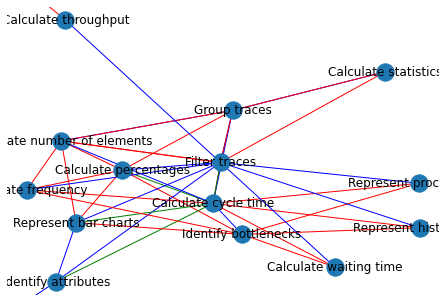

In [11]:
G2=nx.Graph()
G2.add_nodes_from(nodes)
G2.add_edges_from(edges)
nx.draw(G2,
        nodelist=nodes,                         
        edgelist=edges, 
        #width=weightsNormalised,
#         width=weights2,
        edge_color=weights2,
        with_labels=True
       )#node_size=length

In [15]:
for weight, edge in zip(weights,edges):
    print(edge[0]+"-"+edge[1]+" : "+str(weight))

    G2[edge[0]][edge[1]]['weight']=weight

Calculate percentages-Calculate cycle time : 92.73
Calculate percentages-Calculate number of elements : 65.45
Calculate percentages-Filter traces : 85.45
Calculate percentages-Identify bottlenecks : 54.55
Calculate percentages-Group traces : 50.91
Identify attributes-Calculate cycle time : 91.18
Identify attributes-Filter traces : 76.47
Identify attributes-Calculat number of elements : 70.59
Represent bar charts-Calculate cycle time : 91.67
Represent bar charts-Filter traces : 83.33
Represent bar charts-Calculate percentages : 63.89
Represent bar charts-Calculate number of elements : 58.33
Represent bar charts-Identify bottlenecks : 58.33
Represent bar charts-Identify attributes : 50.0
Calculate number of elements-Calculate cycle time : 89.47
Calculate number of elements-Filter traces : 80.26
Calculate number of elements-Group traces : 53.95
Represent process map-Calculate cycle time : 89.36
Represent process map-Identify bottlenecks : 65.96
Represent process map-Filter traces : 61.7
R